# Distribución de poisson
Sean cuatro variables aleatorias independientes ξi, todas con distribución de
Poisson con media igual 1/2. Determínese P(τ ≤ 1) siendo

$$τ =\frac{ξ1 + ξ2 + ξ3 + ξ4}4$$

1. Identifique las variables.
ξ1,ξ2,ξ3,ξ4
2. Determine la distribución de probabilidad de cada variable 
3.  modele las variables aleatorias

Por la descripción del probelma sabemos que las variables sigen una distribucion de poisson con  media igual a 1/2.
usaremos la funcion poisson.rvs para generar numeros aleatorios que sigan esa distribución.

4. Defina el modelo del sistema y los objetivos de la simulación 
Si $\frac{ξ1 + ξ2 + ξ3 + ξ4}4\leq1$ entones $τ\leq1$

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una estimación de la probabilidad.



In [115]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [116]:
def Probabilidad():        #Esta función devuelve el valor 1 si t es menor o igual a 1         
    menor=0                      
    x_1 = poisson.rvs(0.5) 
    x_2 = poisson.rvs(0.5)
    x_3 = poisson.rvs(0.5)  
    x_4 = poisson.rvs(0.5)
    if 1 >=  (x_1 + x_2 +x_3 + x_4)/4 :
        menor += 1
    return menor

In [117]:
Probabilidad()

1

5. Diseñe el experimento

Ejecutamos  n  veces la función anterior y calculamos de manera acumulativa la probabilidad.

In [118]:
def prob_i(n):                    
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que se cumple la desigualdad y dividir entre las veces que 
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += Probabilidad()
        prob.append(inter/(i+1))
    return prob

In [119]:
X=prob_i(10000)
print(np.mean(X))

0.9481026158036406


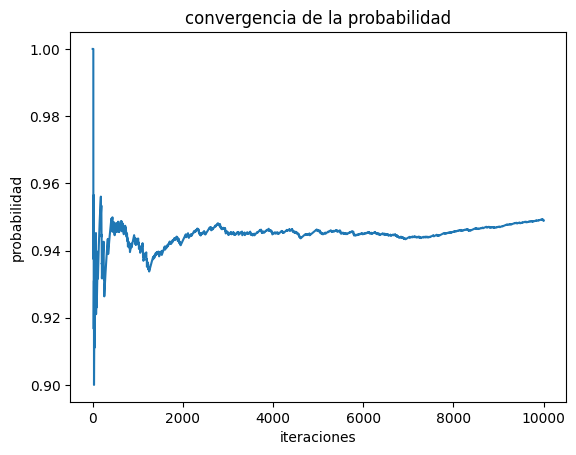

In [114]:
plt.plot(X) # La gráfica muestra que la convergencia está garantizada con 10000 iteraciones
plt.title('convergencia de la probabilidad')
plt.xlabel('iteraciones') 
plt.ylabel('probabilidad') 
plt.show()

In [106]:
print(np.mean(X), np.std(X))

0.9475437417133704 0.0033308587560654914


6. Repita el experimento  n  veces

In [110]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_i(500)
        lista.append(np.mean(s))
    return lista

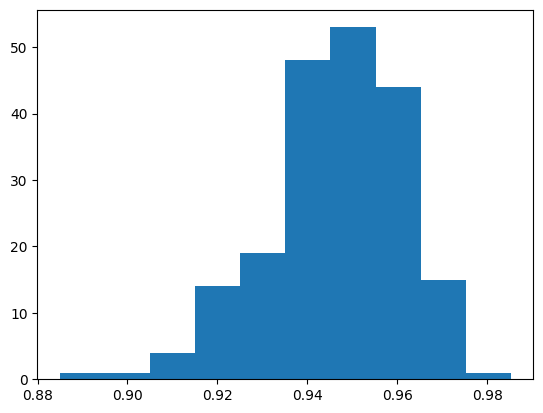

In [112]:
Y=modelo(200)
plt.hist(Y)
plt.show()

# Analiticamente
Como las variables aleatorias $X_1$, $X_2$, $X_3$ y $X_4$ son independientes y tienen distribución de Poisson con  $\lambda=1/2$, su función de probabilidad es:

$$
P(X_i = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

donde $i \in \{1,2,3,4\}$ y $k \in \mathbb{N}_0$.

Sea $τ = (X_1 + X_2 + X_3 + X_4)/4$. Entonces, la media y la varianza de $τ$ son:

$$
\begin{aligned}
E(τ) &= E\left(\frac{X_1 + X_2 + X_3 + X_4}{4}\right) \\
&= \frac{E(X_1) + E(X_2) + E(X_3) + E(X_4)}{4} \\
&= \frac{4\lambda}{4} \\
&= \lambda = \frac{1}{2}
\end{aligned}
$$

y

$$
\begin{aligned}
Var(Y) &= Var\left(\frac{X_1 + X_2 + X_3 + X_4}{4}\right) \\
&= \frac{Var(X_1) + Var(X_2) + Var(X_3) + Var(X_4)}{16} \\
&= \frac{4\lambda}{16} \\
&= \frac{\lambda}{4} \\
&= \frac{1}{8}
\end{aligned}
$$


Queremos encontrar $P(τ \leq 1)$. Es decir,

$$
P(τ \leq 1) = P(τ=0) + P(τ=1)
$$

Sustituyendo en la formula:

$$
\begin{aligned}
P(τ=0) + P(τ=1) &= \frac{(1/2)^0 e^{-1/2}}{0!} + \frac{(1/2)^1 e^{-1/2}}{1!} \\
&= e^{-1/2} \left(1 + \frac{1}{2}\right) \\
&= \frac{3}{2} e^{-1/2} \approx 0.919
\end{aligned}
$$

Por lo tanto, $P(τ \leq 1) \approx 0.919$.